# Calibrating

In [30]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import pandas as pd
from importlib import reload

#project code
import data_info as di

## Scale Calibration

In [12]:
# checking the weights of different bottles
bottle_w = np.array([456, 450, 458, 454, 450, 456, 454, 452, 454, 454, 452, 450])

print("Bottle weight: ", np.mean(bottle_w))
print("            +/-   ", np.std(bottle_w))

Bottle weight:  453.3333333333333
            +/-    2.494438257849294


In [5]:
# check how bottles changed over measurements
d_water = 997 # kg/m³
# 0 - bottle weight
# 1 - neck volume
# 2 - total volume

b12 = [[458, 454, 454, 456],
       [464, 472, 474, 472],
       [514, 518, 518, 518]]

b5 = [[452, 452, 450],
      [472, 476, 474],
      [518, 518, 518]]

b2 = [[450, 448, 450],
      [472, 476, 472],
      [520, 520, 520]]

## Bottle volume calibration

In [4]:
# neck vs. full volume for each bottle

## Analyzer calibration

In [101]:
reload(di)

<module 'data_info' from '/Users/clever/111b_working/lab_HRH/data_info.py'>

In [102]:
# take all calib files and figure out the index of resonance
calib_files = [f"data/calib/{n}Hz.csv" for n in di.calib_f]
calib_f = np.array([di.f_max(csv_f) for csv_f in calib_files])
calib_f

array([1012, 1006,  999,  993,  987,  980,  974,  967,  961])

In [103]:
calib_scaled = [di.csv_fq(i) for i in calib_f]
print(calib_scaled)

[101.46341463414635, 148.29268292682926, 202.9268292682927, 249.7560975609756, 296.5853658536585, 351.2195121951219, 398.0487804878049, 452.6829268292683, 499.5121951219512]


In [110]:
diff_f = di.calib_f - calib_scaled
diff_f

array([-1.46341463,  1.70731707, -2.92682927,  0.24390244,  3.41463415,
       -1.2195122 ,  1.95121951, -2.68292683,  0.48780488])

In [111]:
np.mean(abs(diff_f))

1.7886178861788646

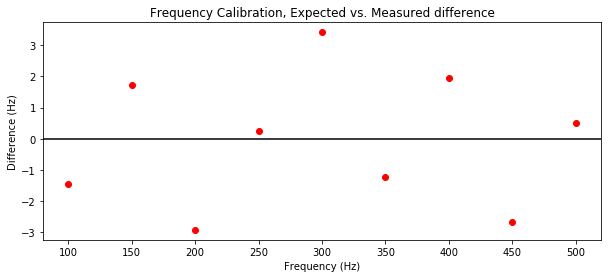

In [136]:
# plotting differences between real and expected
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(di.calib_f, diff_f, 'ro')
plt.axhline(0, color = "black")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Difference (Hz)")
plt.title(f"Frequency Calibration, Expected vs. Measured difference")
plt.savefig("plot/f_calib.png", dpi=300)

In [124]:
cf_all = None

for i, csv_f in enumerate(calib_files):
    np_tmp = np.genfromtxt(csv_f, delimiter=',')
    if i == 0:
        cf_all = np_tmp
    else:
        cf_all = np.hstack((cf_all, np_tmp))
        
cf_all = np.flip(cf_all, axis = 0)

In [129]:
fqs = np.flip(di.csv_fq(np.arange(0, cf_all.shape[0])).astype(int))
fqs

array([   7,   15,   23, ..., 7984, 7992, 8000])

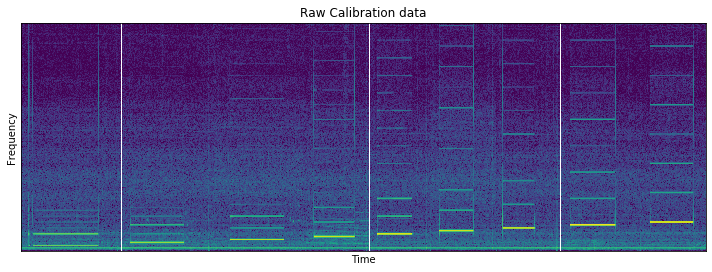

In [144]:
plt.rcParams["figure.figsize"] = (10,4)
plt.imshow(cf_all[:500], vmin=0, origin = 'lower',  extent=[0,300,0,100])
plt.yticks([])
plt.xticks([])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Raw Calibration data")
plt.tight_layout()
plt.savefig("plot/raw_calib.png", dpi=300)